In [191]:
# As as demo on what it takes to become a good data science and machine learning specialist 
# I used House Prices: Advanced Regression Techniques data from Kaggle
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/35447
# This dataset is given to us to explore and apply models
# We have just scratched our back showed some models
# Did some data exploration
# Applied some novel techniques
# But realworld problems are more engrossing and challenging
# This is just to showcase this can be done in structured manner. Its a mix of Science and Art.

In [96]:
# Data Exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import chi2
%matplotlib inline

In [141]:
#reading the training data
train_data=pd.read_csv("/home/ubuntu/Kaggle-Home/datascience/House/dataset/train.csv")
#reading the test data
test_data=pd.read_csv("/home/ubuntu/Kaggle-Home/datascience/House/dataset/test.csv")

train_data = train_data.dropna(axis=1, how='any')
train_data.drop('Id',1,inplace=True)

test_data = test_data.dropna(axis=1, how='any')
test_data.drop('Id',1,inplace=True)

In [77]:
#Handling numerical variables
numeric_data=train_data._get_numeric_data().columns
print(numeric_data)

Index([u'MSSubClass', u'LotArea', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF',
       u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')


In [78]:
#Correlation of all numeric features with SalePrice
corr=train_data[numeric_data].corr()['SalePrice']
corr[np.argsort(corr,axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [79]:
#useful features are those highly correlated with SalePrice
useful_numeric=corr[corr[numeric_data]>0.5]
print(useful_numeric)

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


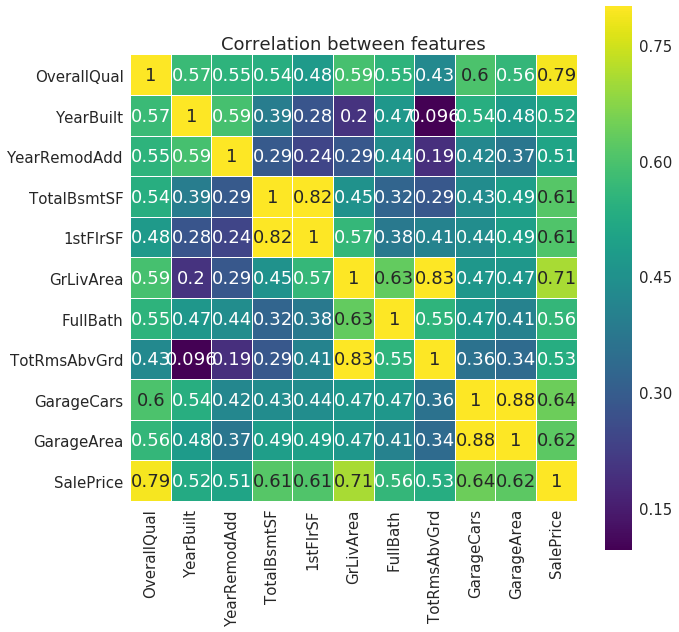

In [91]:
useful_numeric.index.values
correlation_matrix=train_data[useful_numeric.index.values].corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

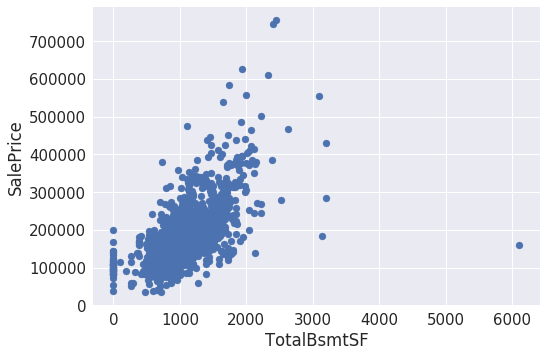

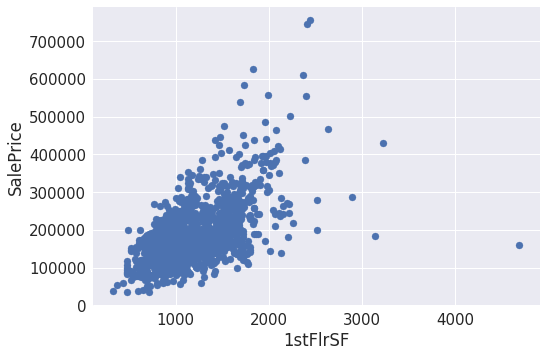

In [92]:
#As these features are highly correlated,we can drop one of each feature or create new feature by combining these.
#scatter plot between these variables and SalePrice
plt.scatter(train_data['TotalBsmtSF'],train_data['SalePrice'])
plt.ylabel("SalePrice")
plt.xlabel("TotalBsmtSF")
plt.show()
plt.scatter(train_data['1stFlrSF'],train_data['SalePrice'])
plt.ylabel("SalePrice")
plt.xlabel("1stFlrSF")
plt.show()

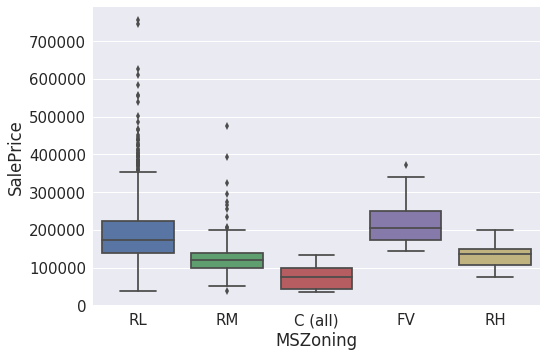

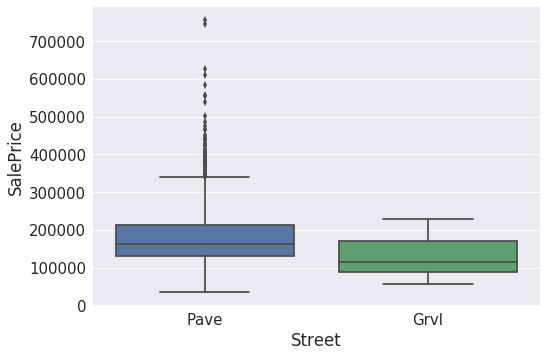

In [93]:
cat_column = ['MSZoning', 'Street']
for feature in cat_column:
    sns.boxplot(train_data[feature],train_data['SalePrice'])
    plt.ylabel("SalePrice")
    plt.xlabel(feature)
    plt.show()

In [136]:
# Lets apply one models from trivial to more complex.
# sklearn has plenty of them and easy to use
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model

In [137]:
# some functions which will help us evaluate the models so lets 
# define them here
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5
RMSE = make_scorer(mean_squared_error_, greater_is_better=False)
def rmse_cv(model,X,y):
    return np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))

In [142]:
# We shd split our data so that we have build our models and 
# test against the test data set
X=train_data
y=X.loc[:,'SalePrice']
X.drop('SalePrice',1,inplace=True)
#dummy variables
# This dataset has categorical variables so we need to convert them into 1-hot encoding format
X=pd.get_dummies(X)

# We will split the data into Training Data set 
# and test dataset
# the intuition here is that we use training data to train our models
# we use test dataset to test them out
trainingX=X.loc[:1000,:]
trainingY=y.loc[:1000]
testY=y.loc[1001:]
testX=X.loc[1001:,:]

In [143]:
# Lets start by applying linear models
# we have multinomial regression problem to solve
reg = linear_model.LinearRegression()
reg.fit(trainingX,trainingY)
print(reg.coef_)
np.mean((reg.predict(testX)-testY)**2)


[ -6.20414060e+01   5.65474293e-01   7.96672609e+03   4.38288288e+03
   2.32826524e+02   1.45555002e+02   1.47966829e+01   5.20073812e+00
  -8.05759274e+00   1.19398289e+01   2.26778862e+01   1.86768672e+01
  -4.05192911e+00   3.73028204e+01   2.48356467e+03   2.03341135e+03
   4.31964437e+03   2.14923932e+03  -6.31074791e+03  -1.93523461e+04
   3.74953163e+03   4.26377735e+03   1.12669332e+03   1.95988234e+01
   1.25303756e+01   1.78363952e+00   5.87204538e+00   1.23584436e+01
   4.79741808e+01  -2.10096971e+01   7.46754375e-01  -1.05395399e+03
  -4.47062175e+02  -2.55378944e+04   9.04644392e+03  -3.79060557e+02
   9.84307486e+03   7.02743621e+03  -1.58282912e+04   1.58282912e+04
  -3.81910930e+03   3.68394847e+03   1.97394373e+03  -1.83878290e+03
  -8.55766046e+03   8.18109643e+03  -3.14751198e+03   3.52407601e+03
   1.81554074e+04  -1.81554074e+04   2.65383905e+03   6.37111004e+03
  -1.27115689e+03  -9.84666807e+03   2.09287588e+03   5.23895860e+03
   1.34701661e+04  -1.87091247e+04

1633736372.686775

In [145]:
predtestY = reg.predict(testX)
mean_squared_error_(testY,reg.predict(testX))

40419.504854547333

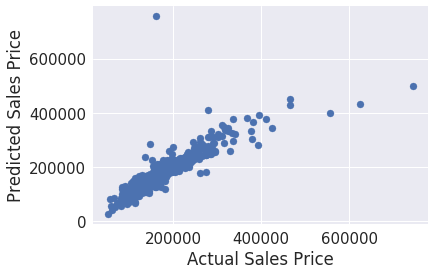

In [153]:
# lets visualize a solution
# We plotted ground truth vs Predicted truth
# we see some linearity in the system
# but we also see some cases where we miss out big time
# Our models expect the sales price of some houses given its features go that high
# something looks fishy 
plt.scatter(testY,predtestY)
plt.xlabel("Actual Sales Price")
plt.ylabel("Predicted Sales Price")
plt.show()

('Mean squared error: %.2f', 40213.8932559389)


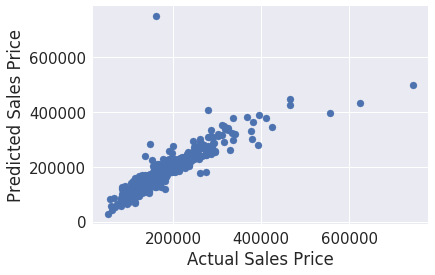

In [175]:
# We used Linear Models but with regularization to penalize the weights
# here we used lasso model
# we fitted, we found the mean square error which is smaller our linear regression without regularization
# It is expected and good 
lasso_reg = linear_model.Lasso(alpha=0.4)
lasso_reg.fit(trainingX,trainingY)

print("Mean squared error: %.2f", mean_squared_error_(testY, lasso_reg.predict(testX)))
ptestY = lasso_reg.predict(testX)

plt.scatter(testY,ptestY)
plt.xlabel("Actual Sales Price")
plt.ylabel("Predicted Sales Price")
plt.show()

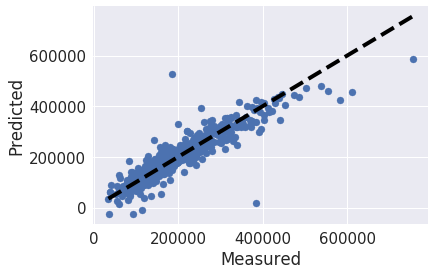

In [177]:
# Here we used a cross validation techniques to understand and see how 
# our model is doing compared to actual ground truth
# The black dotted lines show what would have been if it 
# was a perfect match meaning whatever we would had predicted would be 
# our ground truth.
from sklearn.model_selection import cross_val_predict

lr = linear_model.Lasso(alpha=0.4)
ptrainY = cross_val_predict(lr, trainingX, trainingY, cv=10)

fig, ax = plt.subplots()
ax.scatter(trainingY, ptrainY)
ax.plot([trainingY.min(), trainingY.max()], [trainingY.min(), trainingY.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [183]:
# We will not use another model linear model Ridge
# but move on to more advanced models like Random Format
# they seem to give better results as they average our by predicting using multiple tress
# not use using more than K features to create a decision trees
# apparently, a fundamental problem comes in deciding the features.
# Sklearn comes handy with Grid Search
rfr = RandomForestRegressor(n_jobs=1, random_state=0)
param_grid = {'n_estimators': [500], 'max_features': [10,15,20,25], 'max_depth':[3,5,7,9,11]}
model = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
model.fit(trainingX, trainingY)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_features': [10, 15, 20, 25], 'max_depth': [3, 5, 7, 9, 11]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error_, greater_is_better=False),
       verbose=0)

In [179]:
print(model.best_params_)

{'max_features': 25, 'n_estimators': 500, 'max_depth': 11}


In [181]:
# we would use 500 Random Forest Trees 
# Only pick 25 features out of dataset to create a Random Forest Tree
# Restrict the depth of a random forest to 11
# This is what our GridSearchCV Analysis gave us
max_features=25
max_depth=11
estimators=500
rfr = RandomForestRegressor(n_jobs=1, random_state=0,n_estimators=estimators,max_features=max_features,max_depth=max_depth)
rfr.fit(trainingX, trainingY)
mean_squared_error_(testY,rfr.predict(testX))
# The output shows we are further reduced the error by using Random Forest Model on 
# Test Data Set

30878.114926805916

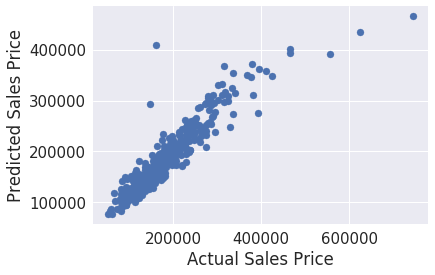

In [182]:
# lets visualize a solution
# We plotted ground truth vs Predicted truth
# Our models got better the sales price of some houses given its features predicted very HIGH Sales
# in linear models, we dont see this here
# Looks like our Random Forest Model is doing better
predtestY = rfr.predict(testX)
plt.scatter(testY,predtestY)
plt.xlabel("Actual Sales Price")
plt.ylabel("Predicted Sales Price")
plt.show()

In [186]:
# We cannot really visualize High Dimension Data. Its commonly known as Curse of Dimensionality
# One analysis I always do is reduce the dimensions and plot and then see concentration of data
# Check if there are other outliers in the data.
# If I can visualize the high dimension and then apply Outlier Detection Algo 
# We use PCA
#PCA
from sklearn.decomposition import PCA, NMF
pca = PCA(n_components=4, svd_solver='full')
pca.fit(trainingX)
pcavar_explained = [round(a,4) for a in pca.explained_variance_ratio_]
pcavar_explained
# Hmm I am very lucky to see that out of 216 features PCA 1st components explains 0.9886 of the variance
# I would analysis this further, but take this to visualize my data
# Since I can take first principal component it makes my job of analyzing data easy

[0.9886, 0.0036, 0.0026, 0.0021]

In [189]:
pcatrainingX = pca.fit_transform(trainingX)
pcatestX = pca.fit_transform(testX)
pcatrainingX[:,0]

array([-2240.0840198 , -1086.48380637,   559.80226279, ...,  -915.28995133,
       -3927.8790444 ,  -505.88914755])

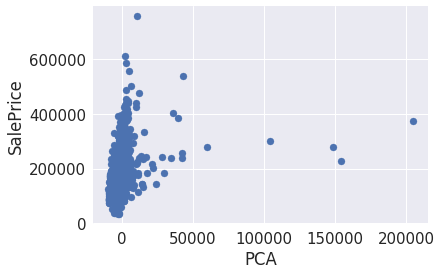

In [188]:
# I am plotting features vs Sales Amount
#  The data will be scattered but I also see some extreme values
# for some PCA principal component value I see Sales Prices gone really high
# On the other hand, PCA component values for same Sales Price has taken really high value.
# This tells me that there is a lot of variabilty in the data. 
# Outlier analysis will be required of this will hurt my model
plt.scatter(pcatrainingX[:,0],trainingY)
plt.ylabel("SalePrice")
plt.xlabel("PCA")
plt.show()

In [184]:
# To Get Even Better Results we need to go Deep and do some statistics
# Here is some bit of it

In [120]:
# This analysis is done to eliminate multicollinearity on the data
# Unfortunately didnt find anything in sklearn in R language its possible to 
# look at p-values,VIF and eliminate feature one by one till you find 
# all records with VIF threshold.
# So I used statsmodels for illustration. 
# I have just demonstrated for one record elmininating one feature
# we found that feature "BsmtFinSF1" has inf VIF values should not be used.
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_data=train_data._get_numeric_data().columns
vtrain_data = train_data[numeric_data]
variables = range(vtrain_data.shape[1])
cnames = vtrain_data.columns.values[variables]
vtrain_data[cnames].values
#range(train_data[cnames].shape[1])


array([[    60,   8450,      7, ...,      2,   2008, 208500],
       [    20,   9600,      6, ...,      5,   2007, 181500],
       [    60,  11250,      7, ...,      9,   2008, 223500],
       ..., 
       [    70,   9042,      7, ...,      5,   2010, 266500],
       [    20,   9717,      5, ...,      4,   2010, 142125],
       [    20,   9937,      5, ...,      6,   2008, 147500]])

In [124]:
vif = [variance_inflation_factor(train_data[cnames].values, ix) for ix in range(train_data[cnames].shape[1])]
maxloc = vif.index(max(vif))
maxloc
print('dropping \'' + vtrain_data.columns.values[maxloc] + '\' at index: ' + str(maxloc))
#del variables[maxloc]

dropping 'BsmtFinSF1' at index: 6


In [125]:
# As an alternate way
# we can also use ExtraTreesClassifier
# This is commonly used by sklearn developers to find out the possible features which 
# may have impact on 

from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=500,random_state=0)

trainingY=train_data.loc[:,'SalePrice']
train_data.drop('SalePrice',1,inplace=True)
trainingX = train_data
forest.fit(trainingX, trainingY)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# This code tells me that importance of features which are indices in trainingX
# have following importance.
# It uses forests of trees to evaluate the importance of features on an artificial classification task
# The idea is to use minimimal features which are above threshold for a model
# Dont use all of it because in realworld problems it never gives better results.
indices

Feature ranking:


array([ 13,   8,   1,  31,  23,  10,   9,   4,   6,   5,  32,  25,  24,
        20,   2,  11,  18,  21,   3,  14,  22,   0,  54,  17,  50,  40,
        43, 114, 107, 179,  16, 116, 181, 183, 213,   7,  26,  85, 110,
       155, 188, 139, 168, 166, 148, 135, 189, 133, 150,  28,  70, 164,
       208, 140,  36, 156, 169,  63,  47, 160, 100, 209, 161, 105, 152,
        51,  65,  37,  15, 196, 167, 136, 199,  84,  77,  75, 104,  78,
       112,  55,  30,  66, 186,  52, 197,  74,  72, 206,  79, 214, 184,
       130,  56,  69, 185,  44,  61,  81,  64, 132,  41,  45,  83, 180,
       200, 147, 157, 103,  34,  19,  73,  27, 111,  67, 193, 192, 102,
        46, 141,  89, 158, 187, 198,  87, 163, 138, 212, 145,  12, 154,
        62,  80, 174, 170, 101, 120,  76, 142, 190, 127,  35, 106, 194,
        58,  42, 149, 175,  88,  94,  82, 211, 203,  60, 144,  68,  71,
       115,  57, 109,  33, 113, 159,  86,  29, 124, 205, 108, 204, 153,
       126, 171,  53, 117, 176,  39,  91,  38,  93, 201, 125, 20

In [84]:
# Analyzing data
# At times its a challenge if the observations seens from Housing data is consistent
# Because the house price are recorded from several locations from several different agents
# One can expect a fault.

# In machine learning the problems is 
# Given N training records with P features observed from the some unknown distribution D
# how likely is that test records (on which we are asked to evaluate
# the dependent variables) were also drawn from the same distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [74]:
df=pd.read_csv("/home/ubuntu/Kaggle-Home/datascience/House/dataset/train.csv")
df = df.dropna(axis=1, how='any')
df.drop('Id',1,inplace=True)
Y=df.loc[:,'SalePrice']
df.drop('SalePrice',1,inplace=True)
df=pd.get_dummies(df)

In [61]:
testdf=pd.read_csv("/home/ubuntu/Kaggle-Home/datascience/House/dataset/test.csv")
testdf.drop('Id',1,inplace=True)
testdf = testdf.dropna(axis=1, how='any')
testdf=pd.get_dummies(testdf)
len(testdf)

1459

In [62]:
#set(df.columns.values).intersection(set(testdf.columns.values))
common = set(df.columns.values) - set(testdf.columns.values)


commonrev = set(testdf.columns.values) - set(df.columns.values)
testdf.drop(commonrev, axis=1, inplace=True)
df.drop(common, axis=1, inplace=True)

In [47]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(df)
y_pred_train = clf.predict(df)
y_pred_test = clf.predict(testdf)

In [54]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size

In [55]:
n_error_train,n_error_test

(1169, 1457)

In [ ]:
# Conclusion: Apparently, this tells us that the data for training and testing is not drawn from the same population

In [75]:
#  Outlier Detection 
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from scipy import stats

n_samples = len(df)
rng = np.random.RandomState(42)
outliers_fraction = 0.25
ground_truth = np.ones(n_samples, dtype=int)
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=rng)}

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(df)
    scores_pred = clf.decision_function(df)
    threshold = stats.scoreatpercentile(scores_pred,
                                            100 * outliers_fraction)
    y_pred = clf.predict(df)
    n_errors = (y_pred != ground_truth).sum()
    print("Classifer " + clf_name + " : " + str(n_errors) + "," + str(threshold))

Classifer Isolation Forest : 365,0.125220111348
Classifer One-Class SVM : 673,-0.000570552444045


In [190]:
# The objective of this analysis and coding is to show the power of ground level hands-on coding done by me
# on a real world problem
# Its is no easy solution requires discovery and deep diving into data using various tools to come up with a solution
# This will make the prediction model more accurate and can be deployed in production.